In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('Position_Salaries.csv')

In [2]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
data.shape

(10, 3)

In [5]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


Text(0, 0.5, 'Salary')

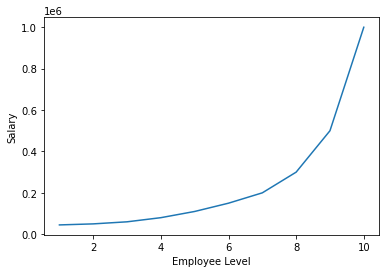

In [8]:
plt.plot(data['Level'],data['Salary'])
plt.xlabel('Employee Level')
plt.ylabel('Salary')

In [9]:
X=data.iloc[:,1]
y=data.iloc[:,-1]

In [10]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures()
X_poly=pf.fit_transform(X.to_numpy().reshape(-1,1))

In [11]:
#degree 2 polynomial
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_poly,y)
print(lr.intercept_)
print(lr.coef_)
print(lr.score(X_poly,y))

232166.6666666665
[      0.         -132871.21212121   19431.81818182]
0.9162082221443942


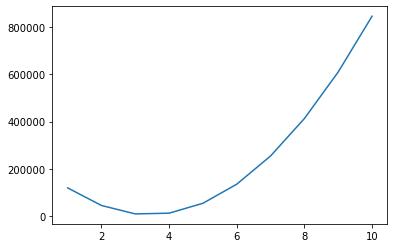

In [12]:
plt.plot(data['Level'],lr.predict(X_poly))

In [13]:
#create polynomial feature 
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(3)
X_poly2=pf.fit_transform(X.to_numpy().reshape(-1,1))
#degree 3 polynomial
from sklearn.linear_model import LinearRegression
lr2=LinearRegression()
lr2.fit(X_poly2,y)
print(lr2.intercept_)
print(lr2.coef_)
print(lr2.score(X_poly2,y))

-121333.33333331218
[     0.         180664.33566432 -48548.95104895   4120.04662005]
0.9812097727913367


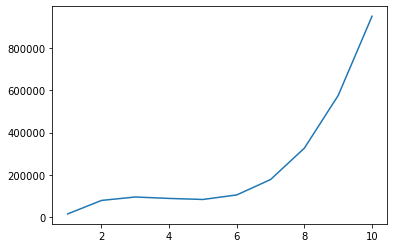

In [14]:
plt.plot(data['Level'],lr2.predict(X_poly2))